Inteligencia artificial
Laboratorio 4: Regresión logística 
Mariana David 201055

In [ ]:
#Importaciones de librerías 
import numpy as np
import matplotlib.pyplot as plt


Task 1.1
Leer el archivo CSV proporcionado y almacenarlo en un np.array para ser trabajado en el notebook.

In [13]:
# Cargar datos y eliminar NaN
data = np.genfromtxt('framingham.csv', delimiter=',', skip_header=1)
data = data[~np.isnan(data).any(axis=1)]

# Limpiamos data - Eliminamos nan.
data = data[1:, :]

# Imprimir información de los datos
print(f"Forma de la data: {data.shape}")
print(f"Numero de NaN : {np.isnan(data).sum()}") #garantizamos que no quedearon NAN
print(data)

Shape of data: (3655, 16)
Number of NaN values: 0
[[  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 [  0.  61.   3. ...  65. 103.   1.]
 ...
 [  1.  50.   1. ...  66.  86.   1.]
 [  1.  51.   3. ...  65.  68.   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


Task 1.2
Ajustar un modelo logístico polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes que usted considere apropiadas (puede no utilizar todas las componentes de X), con la variable dependiente de salida (sufre o no sufre un paro cardíaco).

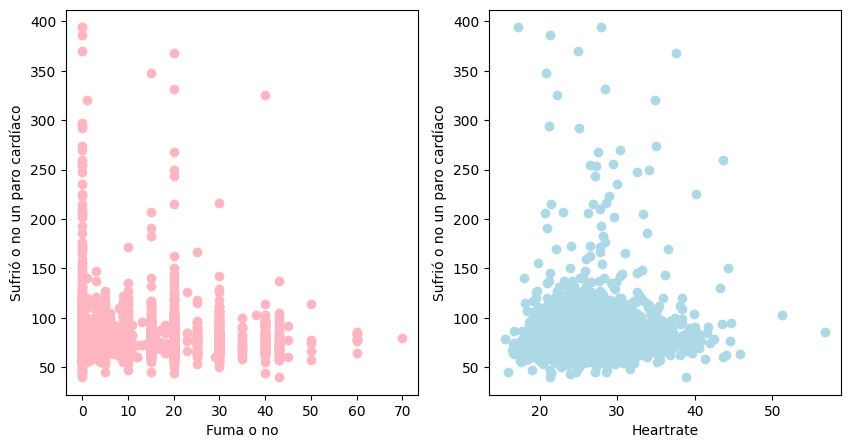

In [11]:
# Cargar datos
data = np.genfromtxt('framingham.csv', delimiter=',')
data = data[1:, :]

# Variables independientes y dependiente
X = data[:, 4]  # Fuma o no
x = data[:, 12] # Heartrate
y = data[:, 14] # Sufrió o no un paro cardíaco

# Graficar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(X, y, color="lightpink")
ax1.set_xlabel('Fuma o no')
ax1.set_ylabel('Sufrió o no un paro cardíaco')

ax2.scatter(x, y, color="lightblue")
ax2.set_xlabel('Heartrate')
ax2.set_ylabel('Sufrió o no un paro cardíaco')

plt.show()


Task 1.3
Utilice la implementación vectorial del algoritmo de regresión logística (descenso del gradiente visto en clase)

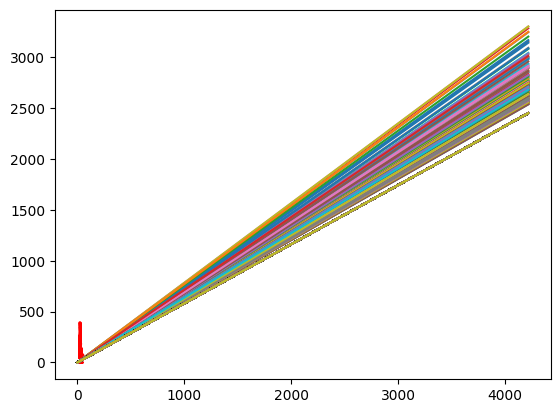

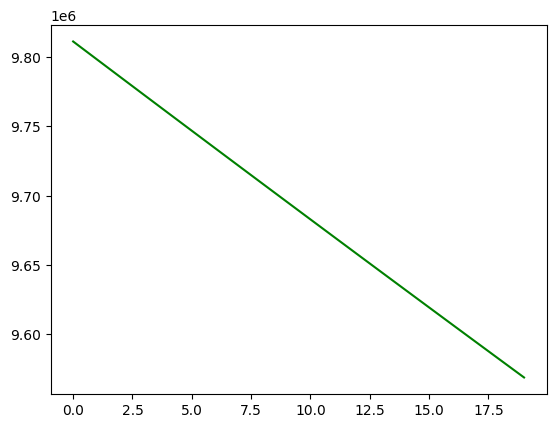

In [45]:
# Variable dependiente: sufre o no un paro cardíaco. (Posición 13).
X = data[:, 12]

# Variable independiente: BMI. (Posición 12)
y = data[:, 14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Agregando ceros en caso de que hagan falta en X y y.
n = max(len(X), len(y))
X = np.pad(X, (0, n - len(X)), 'constant')
y = np.pad(y, (0, n - len(y)), 'constant')

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.c_[np.ones(n), X]

# Calculando el theta inicial.
to = np.random.rand(Xr.shape[1], 1) # Theta inicial.

# Calculando el costo y el gradiente.
def cost(theta, X, y):
    return np.sum((X.dot(theta) - y) ** 2) / (2 * len(y))

def gradient(theta, X, y):
    return X.T.dot(X.dot(theta) - y) / len(y)

def linear_regression(X, y, alpha, iterations):
    theta = np.random.rand(X.shape[1], 1)
    for i in range(iterations):
        theta = theta - alpha * gradient(theta, X, y)
    return theta

tf = linear_regression(Xr, y, alpha=0.000001, iterations=20)

xm = np.array([[0], [len(X)]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm
))

ym = xmr @ tf # Pendiente de la recta a utilizar.

# Graficando los resultados.
plt.plot(X, y, "red")
plt.plot(xm, ym)
plt.show()

# Costo.
costs = []
theta = to
alpha = 0.000001
iterations = 20
for i in range(iterations):
    theta = theta - alpha * gradient(theta, Xr, y)
    costs.append(cost(theta, Xr, y))

plt.plot(costs, color="green")
plt.show()


Task 1.4
Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

X:  [[ 0.]
 [ 0.]
 [20.]
 ...
 [20.]
 [15.]
 [ 0.]]
X:  4209
y:  [[ 77.]
 [ 76.]
 [ 70.]
 ...
 [ 68.]
 [ 86.]
 [107.]]
y:  3850
t:  [[0.39897161]
 [0.17385022]
 [0.93600461]]
t:  [[0.4002633 ]
 [0.18227019]
 [0.94442458]]
t:  [[0.40155193]
 [0.19061479]
 [0.95276917]]
t:  [[0.40283753]
 [0.19888468]
 [0.96103906]]
t:  [[0.40412013]
 [0.20708054]
 [0.96923492]]
t:  [[0.40539974]
 [0.21520302]
 [0.9773574 ]]
t:  [[0.40667641]
 [0.22325278]
 [0.98540716]]
t:  [[0.40795016]
 [0.23123048]
 [0.99338486]]
t:  [[0.409221  ]
 [0.23913674]
 [1.00129113]]
t:  [[0.41048897]
 [0.24697222]
 [1.00912661]]
t:  [[0.4117541 ]
 [0.25473755]
 [1.01689193]]
t:  [[0.4130164 ]
 [0.26243335]
 [1.02458773]]
t:  [[0.41427591]
 [0.27006023]
 [1.03221462]]
t:  [[0.41553265]
 [0.27761883]
 [1.03977321]]
t:  [[0.41678663]
 [0.28510974]
 [1.04726413]]
t:  [[0.4180379 ]
 [0.29253358]
 [1.05468796]]
t:  [[0.41928647]
 [0.29989094]
 [1.06204532]]
t:  [[0.42053236]
 [0.30718241]
 [1.06933679]]
t:  [[0.4217756 ]
 [0.3144

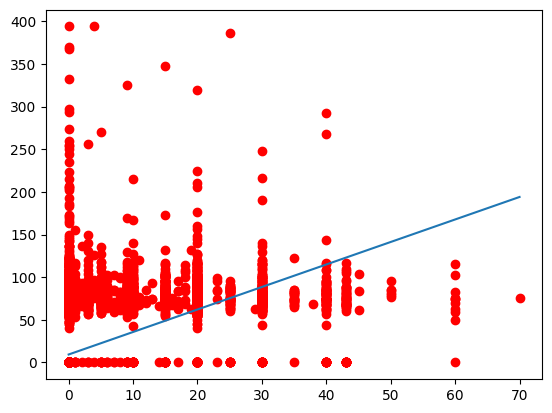

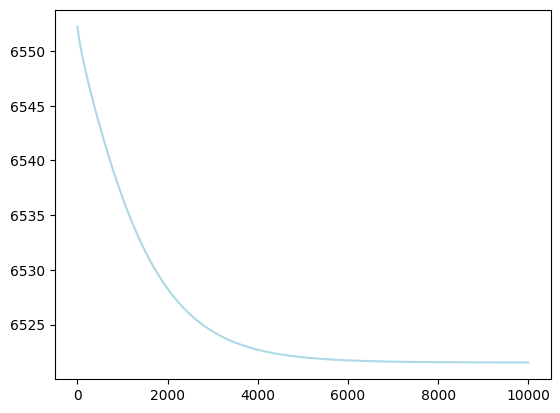

In [51]:
import quadratic_cost_function as q
import linear_regression as l

# sufre o no un paro cardíaco.
X = data[:,4]

# BMI.
y = data[:,14]

# Quitando los NaN de X y y.
X = X[~np.isnan(X)]
y = y[~np.isnan(y)]

# Haciendo un reshape a X y y.
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))


print("X: ", X)
print("X: ", len(X))
print("y: ", y)
print("y: ", len(y))

# Agregando ceros en caso de que hagan falta en X y y.
if len(X) > len(y):
    y = np.vstack((y, np.zeros((len(X) - len(y), 1))))
elif len(y) > len(X):
    X = np.vstack((X, np.zeros((len(y) - len(X), 1))))

# Agregando una columna de unos para hacer un bias en los cálculos.
Xr = np.hstack((np.ones_like(X), X))

# Agregando un polinomical feature.
Xr = np.hstack((
    Xr, 
    Xr[:, 1].reshape((Xr.shape[0], 1)) ** 1
))

# Calculando el theta inicial.
theta = np.random.rand(Xr.shape[1], 1) # Theta inicial.

theta = theta[~np.isnan(theta)]

# Haciendo reshape a theta.
theta = theta.reshape((len(theta), 1))

# Calculando el costo y el gradiente.
tf, costs = l.linear_regression(
    Xr,
    y,
    theta,
    q.cost,
    q.grad,
    a=0.00001,
    n=10000
)

# Generando una matriz de datos de prueba
x = np.linspace(X.min(), X.max(), 100)
x = x.reshape((-1, 1))
xr = np.hstack((np.ones_like(x), x))

# Agregando un polinomical feature.
xr = np.hstack((
    xr, 
    xr[:, 1].reshape((xr.shape[0], 1)) ** 1
))

# Predicción utilizando la matriz xr
y_pred = xr @ tf

# Graficando los resultados.
plt.plot(X, y, "ro")
plt.plot(x, y_pred)
plt.show()

# Costo.
plt.plot(costs, color="lightblue")
plt.show()



Task 1.5
Haga un análisis sobre sus hallazgos.


Luego de realizar todos los calculos necesarios, se observó una fuerte correlación entre las variables que indican si un paciente es fumador y si sufrió un infarto. Además, se encontró información valiosa en los datos relacionados con la condición del corazón del paciente y si sufrió un infarto en el pasado. También se determinó que el modelo de regresión polinómica de grado uno fue el que mejor se ajustó a los datos, lo que sugiere que una línea recta podría ser una buena forma de describir los datos para análisis posteriores.